Tomas Chobola, 28th October 2019

# Data visualisation and web scraping

This notebook focuses on downloading data from the internet (basic web scraping) follwed by data analysis and visualisation. Data I was working with were from website https://www.volby.cz, which offers all statistical data from Czech elections offered by The Czech Statistical Office (CZSO). For the analysis I picked Czech statutory city  Hradec Králové and the results from local authority elections in years 2002, 2006, 2010, 2014 and 2018.

---

<a id='table'></a>

## Table of content

1. [Developement of results for individual political parties (dataset creation)](#file_1)
2. [List of all candidates from all parties during the years (dataset creation)](#file_2)
<br><br>
3. [Analysis of number of political parties and candidates 👆👆👆](#parties)
4. [Election results](#results)
5. [Age distribution of the candidates](#age)
6. [Voter turnout](#turnout)
7. [Ratio of candidates with and without academic title](#title)
8. [Candidate's education](#edu)
9. [Ratio of candidating women and number of elected women](#women)
8. [Frequent candidates](#frequent)

---

<a id='file_1'></a>

## Developement of results for individual political parties (dataset creation)
[Table of content](#table)

First it is necessary to download the data from mentioned wesite.

In [6]:
import pandas as pd

url_2018 = 'https://www.volby.cz/pls/kv2018/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=5201&xobec=569810&xstat=0&xvyber=0'
url_2014 = 'https://www.volby.cz/pls/kv2014/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=5201&xobec=569810&xstat=0&xvyber=0'
url_2010 = 'https://www.volby.cz/pls/kv2010/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=5201&xobec=569810&xstat=0&xvyber=0'
url_2006 = 'https://www.volby.cz/pls/kv2006/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=5201&xobec=569810&xstat=0&xvyber=0'
url_2002 = 'https://www.volby.cz/pls/kv2002/kv1211?xjazyk=CZ&xid=0&xv=1&xdz=3&xnumnuts=5201'

data_2018 = pd.read_html(url_2018,flavor='html5lib', header=0)
data_2014 = pd.read_html(url_2014,flavor='html5lib', header=0)
data_2010 = pd.read_html(url_2010,flavor='html5lib', header=0)
data_2006 = pd.read_html(url_2006,flavor='html5lib', header=0)
data_2002 = pd.read_html(url_2002,flavor='html5lib', header=0)

That is followed by format preprocessing data by changing the format of the percentual gain of the parties since apart from 2002 the dataset use comma instead of dot for the decimal places. Also the dataset uses '\xa0' instead of space. It is required to fix so it can be later transformed to numerical value.

In [7]:
for i in range(1,len(data_2018[1]['Hlasy.1']),1):
    data_2018[1]['Hlasy.1'][i] = float(data_2018[1]['Hlasy.1'][i])/100
    data_2018[1]['Hlasy'][i] = float(data_2018[1]['Hlasy'][i].replace(u'\xa0', u''))
    
for i in range(1,len(data_2014[1]['Hlasy.1']),1):
    data_2014[1]['Hlasy.1'][i] = float(data_2014[1]['Hlasy.1'][i])/100
    data_2014[1]['Hlasy'][i] = float(data_2014[1]['Hlasy'][i].replace(u'\xa0', u''))
    
for i in range(1,len(data_2010[1]['Hlasy.1']),1):
    data_2010[1]['Hlasy.1'][i] = float(data_2010[1]['Hlasy.1'][i])/100
    data_2010[1]['Hlasy'][i] = float(data_2010[1]['Hlasy'][i].replace(u'\xa0', u''))
    
for i in range(1,len(data_2006[1]['Hlasy.1']),1):
    data_2006[1]['Hlasy.1'][i] = float(data_2006[1]['Hlasy.1'][i])/100
    data_2006[1]['Hlasy'][i] = float(data_2006[1]['Hlasy'][i].replace(u'\xa0', u''))
    
for i in range(1,len(data_2002[1]['Hlasy.1']),1):
    data_2002[1]['Hlasy'][i] = float(data_2002[1]['Hlasy'][i].replace(u'\xa0', u''))

For the analysis it is not necessary to use all of the columns so I cam going to select only the most important.

'Kandidátní listina.1' == name of the political party<br>
'Volební strana' == name of the political party (for the 2002 dataset which is in slightly different format)<br>
'Hlasy' == number of votes<br>
'Hlasy.1' == percentual gain

In [8]:
data_2018 = pd.concat([data_2018[1]['Kandidátní listina.1'], data_2018[1]['Hlasy'], data_2018[1]['Hlasy.1']], axis=1)[1:]
data_2014 = pd.concat([data_2014[1]['Kandidátní listina.1'], data_2014[1]['Hlasy'], data_2014[1]['Hlasy.1']], axis=1)[1:]
data_2010 = pd.concat([data_2010[1]['Kandidátní listina.1'], data_2010[1]['Hlasy'], data_2010[1]['Hlasy.1']], axis=1)[1:]
data_2006 = pd.concat([data_2006[1]['Kandidátní listina.1'], data_2006[1]['Hlasy'], data_2006[1]['Hlasy.1']], axis=1)[1:]
data_2002 = pd.concat([data_2002[1]['Volební strana'], data_2002[1]['Hlasy'], data_2002[1]['Hlasy.1']], axis=1)[1:]

For better orientation and easier analysis I am going to rename the names of the columns.

In [9]:
data_2018 = data_2018.rename(columns={'Kandidátní listina.1' : 'Party', 'Hlasy' : 'Votes 2018', 'Hlasy.1' : 'Percentual gain 2018'})
data_2014 = data_2014.rename(columns={'Kandidátní listina.1' : 'Party', 'Hlasy' : 'Votes 2014', 'Hlasy.1' : 'Percentual gain 2014'})
data_2010 = data_2010.rename(columns={'Kandidátní listina.1' : 'Party', 'Hlasy' : 'Votes 2010', 'Hlasy.1' : 'Percentual gain 2010'})
data_2006 = data_2006.rename(columns={'Kandidátní listina.1' : 'Party', 'Hlasy' : 'Votes 2006', 'Hlasy.1' : 'Percentual gain 2006'})
data_2002 = data_2002.rename(columns={'Volební strana' : 'Party', 'Hlasy' : 'Votes 2002', 'Hlasy.1' : 'Percentual gain 2002'})

Because the datasset from 2002 is slightly different from the rest, it is necessary to change names of three parties. In the remaining datasets from 2006, 2010, 2014 and 2018 the names of the following parties are in shortened format.

In [10]:
# aby odpovídaly názvy stran (2002 používá celá jména bez zkracování)
data_2002.at[1,'Party'] = 'Křesť.demokr.unie-Čs.str.lid.'
data_2002.at[4,'Party'] = 'Česká str.sociálně demokrat.'
data_2002.at[6,'Party'] = 'Komunistická str.Čech a Moravy'

Example of preprocessed dataset from year 2006.

In [11]:
data_2006

,Party,Votes 2006,Percentual gain 2006
1,Hradecký demokratický klub,87185,7.72
2,SNK Evropští demokraté,20152,1.79
3,Komunistická str.Čech a Moravy,145899,12.93
4,Strana zelených,44750,3.96
5,HRADECKÁ DOHODA,14810,1.31
6,Česká str.sociálně demokrat.,172812,15.31
7,HRADEČÁCI,12531,1.11
8,Občanská demokratická strana,484805,42.95
9,Křesť.demokr.unie-Čs.str.lid.,51383,4.55
10,Volba pro město,93375,8.27


For exporting the data it is necessary to merge all datasets together and save them into a file. The datasets include a lot of NaN values (for example because the party didn't participated in the elections or simply didn't exist in that year) which I replaced with value 0.

In [12]:
# merging the data into one dataset
data = data_2002.merge(data_2006, on='Party', how='outer')
data = data.merge(data_2010, on='Party', how='outer')
data = data.merge(data_2014, on='Party', how='outer')
data = data.merge(data_2018, on='Party', how='outer')

In [13]:
# replacing NaN with zeros
data = data.fillna('0')

In [14]:
data.to_csv(r'./Analysis_en_files/parties.csv', index=False)

---

<a id='file_2'></a>

## List of all candidates from all parties during the years (dataset creation)

[Table of content](#table)

After the export of data related to the political parties it is necessary to export data about individual candidates.

In [49]:
candidates_url_2018 = 'https://www.volby.cz/pls/kv2018/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=5201&xobec=569810&xstrana=0'
candidates_url_2014 = 'https://www.volby.cz/pls/kv2014/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=5201&xobec=569810&xstrana=0'
candidates_url_2010 = 'https://www.volby.cz/pls/kv2010/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=5201&xobec=569810&xstrana=0'
candidates_url_2006 = 'https://www.volby.cz/pls/kv2006/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=5201&xobec=569810&xstrana=0'
candidates_url_2002 = 'https://www.volby.cz/pls/kv2002/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=5201&xobec=569810&xstrana=0'

candidates_2018 = pd.read_html(candidates_url_2018,flavor='html5lib', header=0)
candidates_2014 = pd.read_html(candidates_url_2014,flavor='html5lib', header=0)
candidates_2010 = pd.read_html(candidates_url_2010,flavor='html5lib', header=0)
candidates_2006 = pd.read_html(candidates_url_2006,flavor='html5lib', header=0)
candidates_2002 = pd.read_html(candidates_url_2002,flavor='html5lib', header=0)

Same as in the previous section it is necessary to fix the percentual fain and replace '\xa0' with space.

In [50]:
for i in range(1,len(candidates_2018[0]['Hlasy.1']),1):
    candidates_2018[0]['Hlasy.1'][i] = float(candidates_2018[0]['Hlasy.1'][i])/100
    candidates_2018[0]['Hlasy'][i] = str(candidates_2018[0]['Hlasy'][i].replace(u'\xa0', u''))
    candidates_2018[0]['Hlasy'][i] = float(candidates_2018[0]['Hlasy'][i])
    
for i in range(1,len(candidates_2014[0]['Hlasy.1']),1):
    candidates_2014[0]['Hlasy.1'][i] = float(candidates_2014[0]['Hlasy.1'][i])/100
    candidates_2014[0]['Hlasy'][i] = str(candidates_2014[0]['Hlasy'][i].replace(u'\xa0', u''))
    candidates_2014[0]['Hlasy'][i] = float(candidates_2014[0]['Hlasy'][i])
    
for i in range(1,len(candidates_2010[0]['Hlasy.1']),1):
    candidates_2010[0]['Hlasy.1'][i] = float(candidates_2010[0]['Hlasy.1'][i])/100
    candidates_2010[0]['Hlasy'][i] = str(candidates_2010[0]['Hlasy'][i].replace(u'\xa0', u''))
    candidates_2010[0]['Hlasy'][i] = float(candidates_2010[0]['Hlasy'][i])
    
for i in range(1,len(candidates_2006[0]['Hlasy.1']),1):
    candidates_2006[0]['Hlasy.1'][i] = float(candidates_2006[0]['Hlasy.1'][i])/100
    candidates_2006[0]['Hlasy'][i] = str(candidates_2006[0]['Hlasy'][i].replace(u'\xa0', u''))
    candidates_2006[0]['Hlasy'][i] = float(candidates_2006[0]['Hlasy'][i])
    
for i in range(1,len(candidates_2002[0]['Kandidát']),1):
    candidates_2002[0]['Kandidát'][i] = str(candidates_2002[0]['Kandidát'][i].replace(u'\xa0', u' '))
    candidates_2002[0]['Hlasy'][i] = str(candidates_2002[0]['Hlasy'][i].replace(u'\xa0', u''))
    candidates_2002[0]['Hlasy'][i] = float(candidates_2002[0]['Hlasy'][i])

Dataset from year 2002 has a seperate column for candidate's academic titles. To keep the format same for all dataset, it is necessary to merge this columnt with the column containing names of the candidates.

In [51]:
for i in range(1,len(candidates_2002[0]['Kandidát']),1):
    if not pd.isnull(candidates_2002[0]['Kandidát.1'][i]): # if the candidate has an academic title
        candidates_2002[0]['Kandidát'][i] = str(candidates_2002[0]['Kandidát'][i]) + ' ' + str(candidates_2002[0]['Kandidát.1'][i])

This is followed by extraction of information from the datasets. For each election year I created seperate dataset.

'Kandidát.1' == name<br>
'Kandidát.2' == age<br>
'Navrhujícístrana' == nominating political party<br>
'Politickápříslušnost' == political party that the candidate is member of<br>
'Hlasy' == number of votes<br>
'Hlasy.1' == percentual gain<br>
'Kandidát' == rank of the candidate on the electoral list<br>
'Pořadízvolení/náhradníka' == final rank of the candidate<br>
'Mandát' == mandate<br>

In [52]:
candidates_2018 = pd.concat([
    candidates_2018[0]['Kandidát.1'], 
    candidates_2018[0]['Kandidát.2'], 
    candidates_2018[0]['Navrhujícístrana'],
    candidates_2018[0]['Politickápříslušnost'],
    candidates_2018[0]['Hlasy'],
    candidates_2018[0]['Hlasy.1'],
    candidates_2018[0]['Kandidát'],
    candidates_2018[0]['Pořadízvolení/náhradníka'],
    candidates_2018[0]['Mandát'],
], axis=1)[1:]

candidates_2014 = pd.concat([
    candidates_2014[0]['Kandidát.1'], 
    candidates_2014[0]['Kandidát.2'], 
    candidates_2014[0]['Navrhujícístrana'],
    candidates_2014[0]['Politickápříslušnost'],
    candidates_2014[0]['Hlasy'],
    candidates_2014[0]['Hlasy.1'],
    candidates_2014[0]['Kandidát'],
    candidates_2014[0]['Pořadízvolení/náhradníka'],
    candidates_2014[0]['Mandát'],
], axis=1)[1:]

candidates_2010 = pd.concat([
    candidates_2010[0]['Kandidát.1'], 
    candidates_2010[0]['Kandidát.2'], 
    candidates_2010[0]['Navrhujícístrana'],
    candidates_2010[0]['Politickápříslušnost'],
    candidates_2010[0]['Hlasy'],
    candidates_2010[0]['Hlasy.1'],
    candidates_2010[0]['Kandidát'],
    candidates_2010[0]['Pořadízvolení/náhradníka'],
    candidates_2010[0]['Mandát'],
], axis=1)[1:]

candidates_2006 = pd.concat([
    candidates_2006[0]['Kandidát.1'], 
    candidates_2006[0]['Kandidát.2'], 
    candidates_2006[0]['Navrhujícístrana'],
    candidates_2006[0]['Politickápříslušnost'],
    candidates_2006[0]['Hlasy'],
    candidates_2006[0]['Hlasy.1'],
    candidates_2006[0]['Kandidát'],
    candidates_2006[0]['Pořadízvolení/náhradníka'],
    candidates_2006[0]['Mandát'],
], axis=1)[1:]

candidates_2002[0] = candidates_2002[0].fillna('')
candidates_2002 = pd.concat([
    candidates_2002[0]['Kandidát'],
    candidates_2002[0]['Věk'],
    candidates_2002[0]['Navrh.strana'],
    candidates_2002[0]['Polit.přísl.'],
    candidates_2002[0]['Hlasy'],
    candidates_2002[0]['Hlasy.1'],
    candidates_2002[0]['Poř.číslo'],
    candidates_2002[0]['Pořadí'],
    candidates_2002[0]['Mandát'],
], axis=1)[1:]

As in the previous section it is necessary to update the names of columns to make it easier to read an analyse.

In [53]:
candidates_2018 = candidates_2018.rename(columns={
    'Kandidát.1' : 'Name', 
    'Kandidát.2' : 'Age', 
    'Navrhujícístrana' : 'Nominating party',
    'Politickápříslušnost' : 'Political party',
    'Hlasy' : 'Votes 2018',
    'Hlasy.1' : 'Percentual gain 2018',
    'Kandidát' : 'Ballot rank',
    'Pořadízvolení/náhradníka' : 'Final rank',
    'Mandát' : 'Mandate'
    })

candidates_2014 = candidates_2014.rename(columns={
    'Kandidát.1' : 'Name', 
    'Kandidát.2' : 'Age', 
    'Navrhujícístrana' : 'Nominating party',
    'Politickápříslušnost' : 'Political party',
    'Hlasy' : 'Votes 2014',
    'Hlasy.1' : 'Percentual gain 2014',
    'Kandidát' : 'Ballot rank',
    'Pořadízvolení/náhradníka' : 'Final rank',
    'Mandát' : 'Mandate'
    })

candidates_2010 = candidates_2010.rename(columns={
    'Kandidát.1' : 'Name', 
    'Kandidát.2' : 'Age', 
    'Navrhujícístrana' : 'Nominating party',
    'Politickápříslušnost' : 'Political party',
    'Hlasy' : 'Votes 2010',
    'Hlasy.1' : 'Percentual gain 2010',
    'Kandidát' : 'Ballot rank',
    'Pořadízvolení/náhradníka' : 'Final rank',
    'Mandát' : 'Mandate'
    })

candidates_2006 = candidates_2006.rename(columns={
    'Kandidát.1' : 'Name', 
    'Kandidát.2' : 'Age', 
    'Navrhujícístrana' : 'Nominating party',
    'Politickápříslušnost' : 'Political party',
    'Hlasy' : 'Votes 2006',
    'Hlasy.1' : 'Percentual gain 2006',
    'Kandidát' : 'Ballot rank',
    'Pořadízvolení/náhradníka' : 'Final rank',
    'Mandát' : 'Mandate'
    })

candidates_2002 = candidates_2002.rename(columns={
    'Kandidát' : 'Name', 
    'Věk' : 'Age', 
    'Navrh.strana' : 'Nominating party',
    'Polit.přísl.' : 'Political party',
    'Hlasy' : 'Votes 2002',
    'Hlasy.1' : 'Percentual gain 2002',
    'Poř.číslo' : 'Ballot rank',
    'Pořadí' : 'Final rank',
    'Mandát' : 'Mandate'
    })

Example of preprocessed dataset from year 2006.

In [54]:
candidates_2006

,Name,Age,Nominating party,Political party,Votes 2006,Percentual gain 2006,Ballot rank,Final rank,Mandate
1,Adamíra Milan,28,NK,BEZPP,298,2.37,25,-,-
2,Adamírová Miroslava,26,NK,BEZPP,268,2.13,36,-,-
3,Bajer Jaroslav Mgr.,30,SZ,SZ,1985,4.43,1,-,-
4,Balík Michal MUDr.,27,SNK ED,BEZPP,431,2.13,34,-,-
5,Baraňáková Markéta PaedDr.,44,ODS,ODS,12887,2.65,27,8,-
...,...,...,...,...,...,...,...,...,...
373,Zlobický Jan,18,NK,BEZPP,315,2.51,13,-,-
374,Žďánský Petr RNDr. CSc.,64,ČSSD,ČSSD,5022,2.9,8,1,-
375,Žitná Irena,62,SNK ED,BEZPP,445,2.2,21,-,-
376,Žižka Josef,26,SZ,BEZPP,1073,2.39,25,-,-


If the candidate has a value in column 'Final rank' but didn't recieve mandate, it means that he/she was a backup.

Finally, only thing remaining is to save the datasets into .csv file.

In [55]:
candidates_2018.to_csv(r'./Analysis_en_files/candidates_2018.csv', index=False)
candidates_2014.to_csv(r'./Analysis_en_files/candidates_2014.csv', index=False)
candidates_2010.to_csv(r'./Analysis_en_files/candidates_2010.csv', index=False)
candidates_2006.to_csv(r'./Analysis_en_files/candidates_2006.csv', index=False)
candidates_2002.to_csv(r'./Analysis_en_files/candidates_2002.csv', index=False)

---

For the analysis it is necessary to read the data from previously saved files.

In [56]:
data = pd.read_csv(r'./Analysis_en_files/parties.csv')

candidates_2018 = pd.read_csv(r'./Analysis_en_files/candidates_2018.csv')
candidates_2014 = pd.read_csv(r'./Analysis_en_files/candidates_2014.csv')
candidates_2010 = pd.read_csv(r'./Analysis_en_files/candidates_2010.csv')
candidates_2006 = pd.read_csv(r'./Analysis_en_files/candidates_2006.csv')
candidates_2002 = pd.read_csv(r'./Analysis_en_files/candidates_2002.csv')

<a id='parties'></a>

## Analysis of number of political parties and candidates
[Table of content](#table)

First visualisation is about the total number of political parties that candidated in each year. In order to get that information I extracted the names of the political parties and calculated the number of unique instances. I saved those calculations into an array and created the following graph.

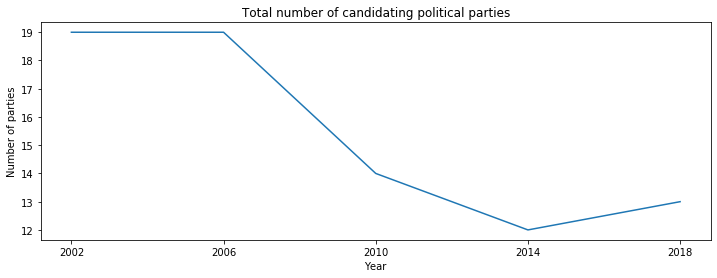

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

n_2018 = len(candidates_2018['Nominating party'].unique())
n_2014 = len(candidates_2014['Nominating party'].unique())
n_2010 = len(candidates_2010['Nominating party'].unique())
n_2006 = len(candidates_2006['Nominating party'].unique())
n_2002 = len(candidates_2002['Nominating party'].unique())
n = [n_2018, n_2014, n_2010, n_2006, n_2002]

plt.plot(n)
ax = plt.gca() # grab the current axis
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])
plt.title('Total number of candidating political parties')
plt.xlabel('Year')
plt.ylabel('Number of parties')
plt.show()

What changes apart from the number of political parties is the number of candidates. Following plot shows the developement of number of candidates during the election years. To extract the data I calculated the length of each dataset with information about the candidates.

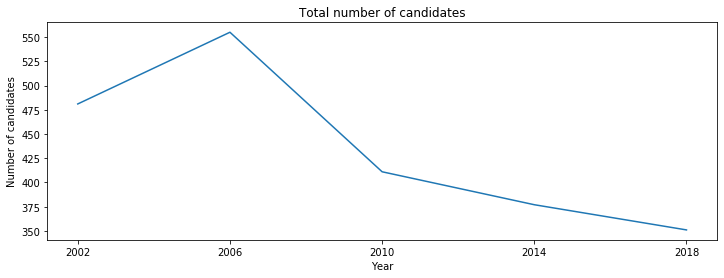

In [58]:
plt.figure(figsize=(12,4))

plt.plot([len(candidates_2018), len(candidates_2014), len(candidates_2010), len(candidates_2006), len(candidates_2002)])
ax = plt.gca() # grab the current axis
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])
plt.title('Total number of candidates')
plt.xlabel('Year')
plt.ylabel('Number of candidates')
plt.show()

The analysis of the number of candidates nominated by each party followed. The function below takes the number of candidates based on the nominating party and saves them into an array.<br>
It is possible to explore this developement throughout the years in interactive widget. The user can pick the name of political party from the list and the development of the number of candidates is shown.

In [59]:
def n_candidates(parties):
    n = []
    
    for party in parties:
        n_2018 = len(candidates_2018[candidates_2018['Nominating party'] == party])
        n_2014 = len(candidates_2014[candidates_2014['Nominating party'] == party])
        n_2010 = len(candidates_2010[candidates_2010['Nominating party'] == party])
        n_2006 = len(candidates_2006[candidates_2006['Nominating party'] == party])
        n_2002 = len(candidates_2002[candidates_2002['Nominating party'] == party])
        n_candidates = [party, n_2002, n_2006, n_2010, n_2014, n_2018]
        n.append(n_candidates)

    return n

In [60]:
import ipywidgets as widgets
from IPython.display import clear_output

parties = pd.concat([
    candidates_2018, candidates_2014, candidates_2010, candidates_2006, candidates_2002
], sort=True)['Nominating party'].unique()

n = pd.DataFrame(n_candidates(parties))
pd.DataFrame(n).columns = ['Party','2002','2006','2010','2014','2018']
 
n

d = widgets.Dropdown(
    options=parties,
    value='ANO',
    description='Party:',
    disabled=False,
)
display(d)

def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        s = change['new']
        clear_output()
        display(d)
        
        plt.plot((n[n['Party'] == s]).values[0][1:])
        ax = plt.gca() # grab the current axis
        ax.set_xticks([0,1,2,3,4])
        ax.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])

        plt.ylim([0,max((n[n['Party'] == s]).values[0][1:]) + 5])
        plt.xlabel('Year')
        plt.ylabel('Number of candidates')
        plt.title('Number of candidites for party ' + s)

d.observe(on_change)

Dropdown(description='Party:', index=9, options=('Piráti', 'ODS', 'VČ', 'ČSSD', 'HDK', 'HP', 'NK', 'KDU-ČSL', …

<a id='results'></a>

## Election results
[Table of content](#table)

The analysis of the election results followed. I extracted the candidates that received a mandate in the particular year and based on that I calculated the number of seats the party obtained. Because of the fact that I am working with separate datasets it was necessary to merge them together<br><br>
The following table shows the number of seats each political party obtained based on the election year.

In [61]:
elected_2018 = candidates_2018[candidates_2018['Mandate'] == '*']['Nominating party'].value_counts()
elected_2014 = candidates_2014[candidates_2014['Mandate'] == '*']['Nominating party'].value_counts()
elected_2010 = candidates_2010[candidates_2010['Mandate'] == '*']['Nominating party'].value_counts()
elected_2006 = candidates_2006[candidates_2006['Mandate'] == '*']['Nominating party'].value_counts()
elected_2002 = candidates_2002[candidates_2002['Mandate'] == '*']['Nominating party'].value_counts()

elected_2018 = pd.DataFrame({'Party' : elected_2018.index, '2018' : elected_2018.values})
elected_2014 = pd.DataFrame({'Party' : elected_2014.index, '2014' : elected_2014.values})
elected_2010 = pd.DataFrame({'Party' : elected_2010.index, '2010' : elected_2010.values})
elected_2006 = pd.DataFrame({'Party' : elected_2006.index, '2006' : elected_2006.values})
elected_2002 = pd.DataFrame({'Party' : elected_2002.index, '2002' : elected_2002.values})

elected = elected_2018.merge(elected_2014, how='outer').merge(elected_2010, how='outer').merge(elected_2006, how='outer').merge(elected_2002, how='outer')
elected = elected.fillna(0)
elected[['2002', '2006', '2010', '2014', '2018']] =\
    elected[['2002', '2006', '2010', '2014', '2018']].apply(pd.to_numeric).astype(int)
elected

,Party,2018,2014,2010,2006,2002
0,ANO,11,6,0,0,0
1,HDK,7,12,0,0,0
2,Piráti,5,0,0,0,0
3,ODS,5,3,6,19,13
4,KDU-ČSL,3,2,1,0,2
5,KSČM,3,4,5,5,6
6,NK,2,1,8,1,1
7,Zelení,1,1,0,0,0
8,ČSSD,0,5,8,7,6
9,TOP 09,0,3,4,0,0


To show the election results in each year I used the data prepared in the previous section. Before I plotted the results I sorted the values so the parties with higher or equal number of votes are on the left side.

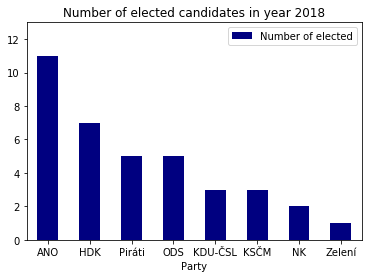

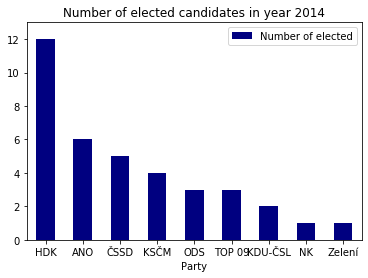

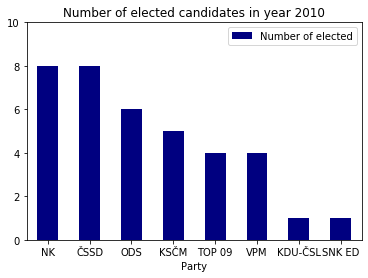

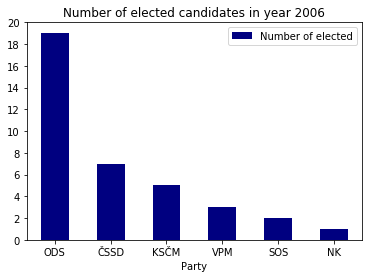

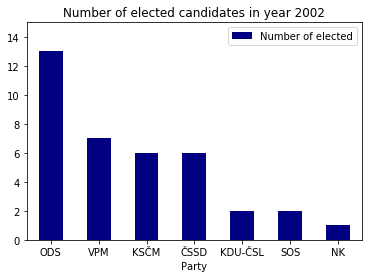

In [62]:
results_2018 = pd.DataFrame({'Party' : elected[elected['2018'] != 0]['Party'], 
                             'Number of elected' : elected[elected['2018'] != 0]['2018']})
results_2018.sort_values('Number of elected', ascending=False).plot.bar(
    x = 'Party', 
    y = 'Number of elected', 
    rot=0, 
    title='Number of elected candidates in year 2018',
    ylim=[0,13],
    color='navy')


results_2014 = pd.DataFrame({'Party' : elected[elected['2014'] != 0]['Party'], 
                              'Number of elected' : elected[elected['2014'] != 0]['2014']})
results_2014.sort_values('Number of elected', ascending=False).plot.bar(
    x = 'Party', 
    y = 'Number of elected', 
    rot=0, 
    title='Number of elected candidates in year 2014',
    ylim=[0,13],
    color='navy')


results_2010 = pd.DataFrame({'Party' : elected[elected['2010'] != 0]['Party'], 
                              'Number of elected' : elected[elected['2010'] != 0]['2010']})
results_2010.sort_values('Number of elected', ascending=False).plot.bar(
    x = 'Party', 
    y = 'Number of elected', 
    rot=0, 
    title='Number of elected candidates in year 2010',
    ylim=[0,10],
    color='navy')


results_2006 = pd.DataFrame({'Party' : elected[elected['2006'] != 0]['Party'], 
                              'Number of elected' : elected[elected['2006'] != 0]['2006']})
results_2006.sort_values('Number of elected', ascending=False).plot.bar(
    x = 'Party', 
    y = 'Number of elected', 
    rot=0, 
    title='Number of elected candidates in year 2006',
    yticks=range(0,21,2),
    color='navy')


results_2002 = pd.DataFrame({'Party' : elected[elected['2002'] != 0]['Party'], 
                              'Number of elected' : elected[elected['2002'] != 0]['2002']})
results_2002.sort_values('Number of elected', ascending=False).plot.bar(
    x = 'Party', 
    y = 'Number of elected', 
    rot=0, 
    title='Number of elected candidates in year 2002',
    ylim=[0,15],
    color='navy')

<a id='age'></a>

## Age distribution of the candidates
[Table of content](#table)

The analysis of the age distribution of the candidates in years 2002, 2006, 2010, 2014 and 2018 followed.

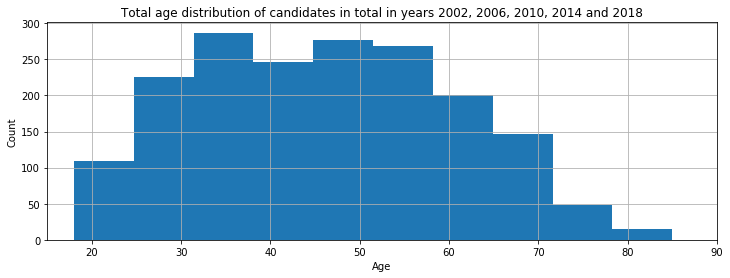

In [74]:
plt.figure(figsize=(12,4))
pd.concat([
#     candidates_2002['Age'], 
    candidates_2006['Age'], 
    candidates_2010['Age'],
    candidates_2014['Age'],
    candidates_2018['Age']
]).hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Total age distribution of candidates in total in years 2002, 2006, 2010, 2014 and 2018')
plt.xlim([15,90])
plt.show()

I continued with the same analysis but for each election year separately. Apart from the age distribution of all candidates I included the age distribution of elected candidates.

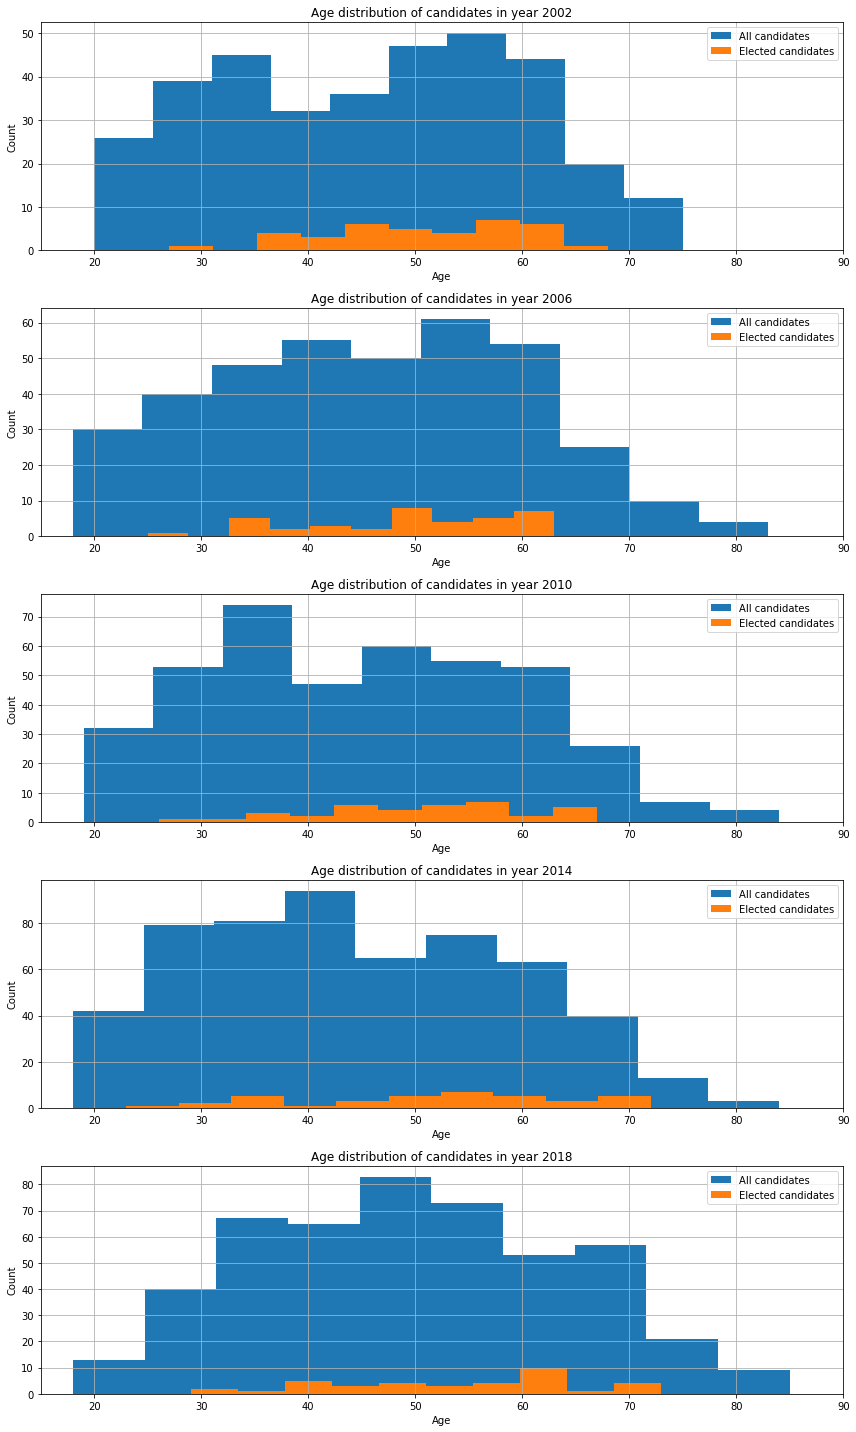

In [76]:
plt.figure(figsize=(12,20))

plt.subplot(511)
candidates_2002['Age'].hist(label='All candidates')
candidates_2002[candidates_2002['Mandate'] == '*']['Age'].hist(label='Elected candidates')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution of candidates in year 2002')
plt.legend()
plt.xlim([15,90])

plt.subplot(512)
candidates_2006['Age'].hist(label='All candidates')
candidates_2006[candidates_2006['Mandate'] == '*']['Age'].hist(label='Elected candidates')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution of candidates in year 2006')
plt.legend()
plt.xlim([15,90])

plt.subplot(513)
candidates_2010['Age'].hist(label='All candidates')
candidates_2010[candidates_2010['Mandate'] == '*']['Age'].hist(label='Elected candidates')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution of candidates in year 2010')
plt.legend()
plt.xlim([15,90])

plt.subplot(514)
candidates_2014['Age'].hist(label='All candidates')
candidates_2014[candidates_2014['Mandate'] == '*']['Age'].hist(label='Elected candidates')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution of candidates in year 2014')
plt.legend()
plt.xlim([15,90])

plt.subplot(515)
candidates_2018['Age'].hist(label='All candidates')
candidates_2018[candidates_2018['Mandate'] == '*']['Age'].hist(label='Elected candidates')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution of candidates in year 2018')
plt.legend()
plt.xlim([15,90])

plt.tight_layout()
plt.show()

Next I plotted the average age of a candidate throughout the election years.

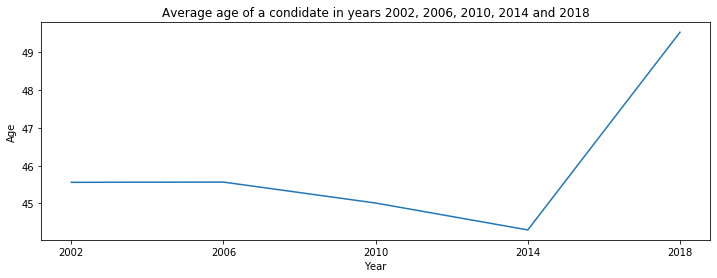

In [78]:
plt.figure(figsize=(12,4))
plt.plot([candidates_2002['Age'].mean(),
          candidates_2006['Age'].mean(),
          candidates_2010['Age'].mean(),
          candidates_2014['Age'].mean(),
          candidates_2018['Age'].mean()])
ax = plt.gca() # grab the current axis 
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])
plt.ylabel('Age')
plt.xlabel('Year')
plt.title('Average age of a condidate in years 2002, 2006, 2010, 2014 and 2018')
plt.show()

I was interesetd if there is some correlation between the age of the candidates and number of obtained mandates. I used the data of political parties ODS, KSČM and NK, which were present in all analysed election years. Unfortunately due to the limited number of datasets it is not possible to declare some strong conlusion. For political party ODS the more young candidates they have, the worse were the results. For political party KSČM however, the results were the opposite.

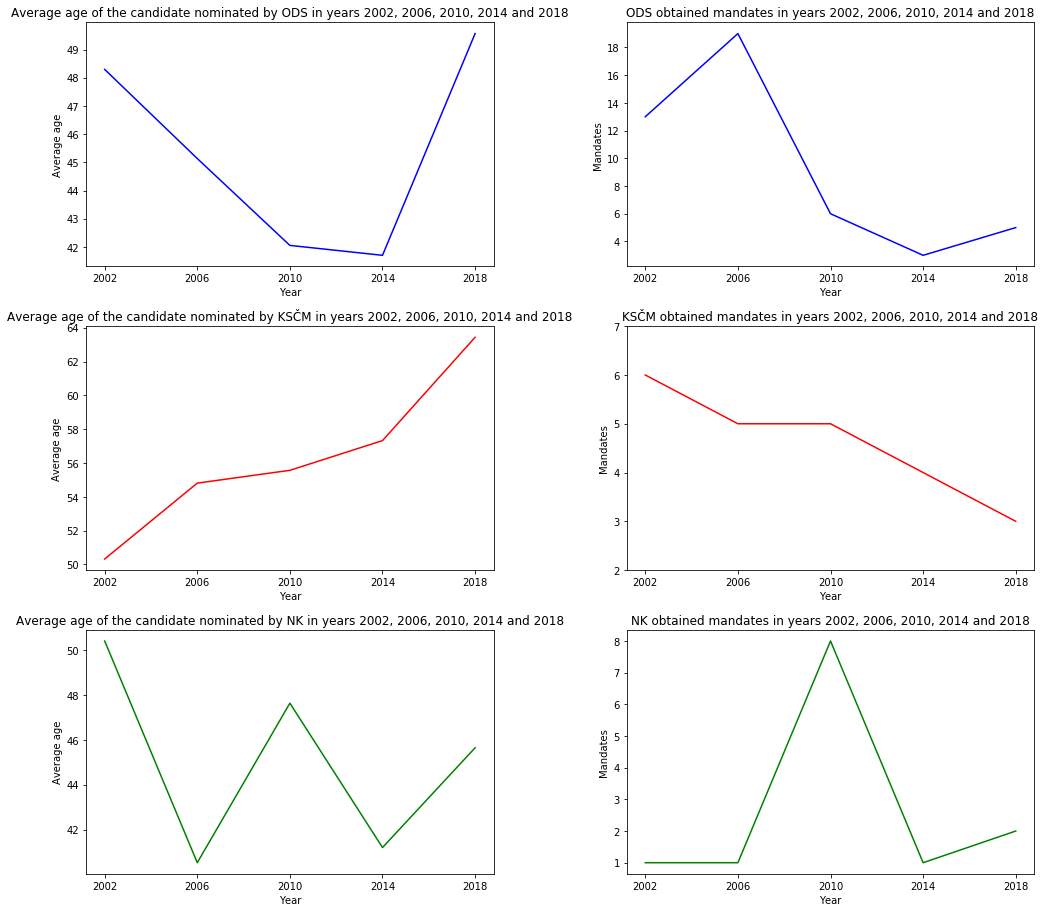

In [80]:
fig = plt.figure(figsize=(15,25))

plt.subplot(6, 2, 1)
plt.plot([candidates_2002[candidates_2002['Nominating party'] == 'ODS']['Age'].mean(),
          candidates_2006[candidates_2006['Nominating party'] == 'ODS']['Age'].mean(),
          candidates_2010[candidates_2010['Nominating party'] == 'ODS']['Age'].mean(),
          candidates_2014[candidates_2014['Nominating party'] == 'ODS']['Age'].mean(),
          candidates_2018[candidates_2018['Nominating party'] == 'ODS']['Age'].mean()], color='b')
ax = plt.gca() # grab the current axis
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])
plt.xlabel('Year')
plt.ylabel('Average age')
plt.title('Average age of the candidate nominated by ODS in years 2002, 2006, 2010, 2014 and 2018')

plt.subplot(6, 2, 2)
plt.plot([results_2002['Number of elected'][3],
          results_2006['Number of elected'][3],
          results_2010['Number of elected'][3],
          results_2014['Number of elected'][3],
          results_2018['Number of elected'][3]], color='b')
ax = plt.gca() # grab the current axis 
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])
plt.xlabel('Year')
plt.ylabel('Mandates')
plt.title('ODS obtained mandates in years 2002, 2006, 2010, 2014 and 2018')

plt.subplot(6, 2, 3)
plt.plot([candidates_2002[candidates_2002['Nominating party'] == 'KSČM']['Age'].mean(),
          candidates_2006[candidates_2006['Nominating party'] == 'KSČM']['Age'].mean(),
          candidates_2010[candidates_2010['Nominating party'] == 'KSČM']['Age'].mean(),
          candidates_2014[candidates_2014['Nominating party'] == 'KSČM']['Age'].mean(),
          candidates_2018[candidates_2018['Nominating party'] == 'KSČM']['Age'].mean()], color='r')
ax = plt.gca() # grab the current axis 
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])
plt.xlabel('Year')
plt.ylabel('Average age')
plt.title('Average age of the candidate nominated by KSČM in years 2002, 2006, 2010, 2014 and 2018')

plt.subplot(6, 2, 4)
plt.plot([results_2002['Number of elected'][5],
          results_2006['Number of elected'][5],
          results_2010['Number of elected'][5],
          results_2014['Number of elected'][5],
          results_2018['Number of elected'][5]], color='r')
ax = plt.gca() # grab the current axis 
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])
ax.set_yticks(range(2,8,1))
plt.xlabel('Year')
plt.ylabel('Mandates')
plt.title('KSČM obtained mandates in years 2002, 2006, 2010, 2014 and 2018')

plt.subplot(6, 2, 5)
plt.plot([candidates_2002[candidates_2002['Nominating party'] == 'NK']['Age'].mean(),
          candidates_2006[candidates_2006['Nominating party'] == 'NK']['Age'].mean(),
          candidates_2010[candidates_2010['Nominating party'] == 'NK']['Age'].mean(),
          candidates_2014[candidates_2014['Nominating party'] == 'NK']['Age'].mean(),
          candidates_2018[candidates_2018['Nominating party'] == 'NK']['Age'].mean()], color='g')
ax = plt.gca() # grab the current axis 
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])
plt.xlabel('Year')
plt.ylabel('Average age')
plt.title('Average age of the candidate nominated by NK in years 2002, 2006, 2010, 2014 and 2018')

plt.subplot(6, 2, 6)
plt.plot([results_2002['Number of elected'][6],
          results_2006['Number of elected'][6],
          results_2010['Number of elected'][6],
          results_2014['Number of elected'][6],
          results_2018['Number of elected'][6]], color='g')
ax = plt.gca() # grab the current axis 
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])
plt.xlabel('Year')
plt.ylabel('Mandates')
plt.title('NK obtained mandates in years 2002, 2006, 2010, 2014 and 2018')

plt.tight_layout()
plt.show()

<a id='turnout'></a>

## Voter turnout 
[Table of content](#table)

I performed the analysis of the voter turnout by adding the numbers of valid votes in years 2002, 2006, 2010, 2014 and 2018 respectively.

/usr/local/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


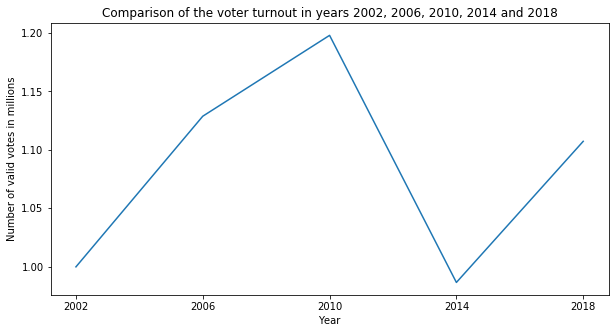

In [81]:
turnout = [pd.to_numeric(data[data['Votes 2002'] != 'X']['Votes 2002']).sum(),
           pd.to_numeric(data[data['Votes 2006'] != 'X']['Votes 2006']).sum(),
           pd.to_numeric(data[data['Votes 2010'] != 'X']['Votes 2010']).sum(),
           pd.to_numeric(data[data['Votes 2014'] != 'X']['Votes 2014']).sum(),
           pd.to_numeric(data[data['Votes 2018'] != 'X']['Votes 2018']).sum()]

turnout = [x / 1000000 for x in turnout] # results shown in millions

fig = plt.figure(figsize=(10,5))

plt.plot(turnout)

ax = plt.gca() # grab the current axis
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])

plt.xlabel('Year')
plt.ylabel('Number of valid votes in millions')
plt.title('Comparison of the voter turnout in years 2002, 2006, 2010, 2014 and 2018')

plt.show()

<a id='title'></a>

## Ratio of candidates with and without academic title
[Table of content](#table)

Next I plotted the percentual value representing the ratio of candidates with academic title. To do that I created a function that searches for the most common Czech academic titles in the candidate's name. Even though it doesn't cover all possible titles, it is enough to get the accurate estimate.

In [83]:
def candidates_with_title(candidates):
    return len(candidates[candidates['Name'].str.contains(
                'Ing.' or 'Bc.' or 'MUDr.' or 'PhDR.' or 'Mgr.' or 'BcA.' or 'MDDr.' or 'MVDr.' or 
                'MgA.' or 'JUDr.'or 'RNDr.' or 'PharmDr.' or 'ThLic.' or 'ThDr.' or 'Ph.D.' or
                'DSc.' or 'CSc.' or 'Dr.' or 'doc.' or 'prof.'
                )])

In [84]:
title_2018 = candidates_with_title(candidates_2018)
title_2014 = candidates_with_title(candidates_2014)
title_2010 = candidates_with_title(candidates_2010)
title_2006 = candidates_with_title(candidates_2006)
title_2002 = candidates_with_title(candidates_2002)

ratio = [title_2002/len(candidates_2002['Name']) * 100,
         title_2006/len(candidates_2006['Name']) * 100,
         title_2010/len(candidates_2010['Name']) * 100,
         title_2014/len(candidates_2014['Name']) * 100,
         title_2018/len(candidates_2018['Name']) * 100]

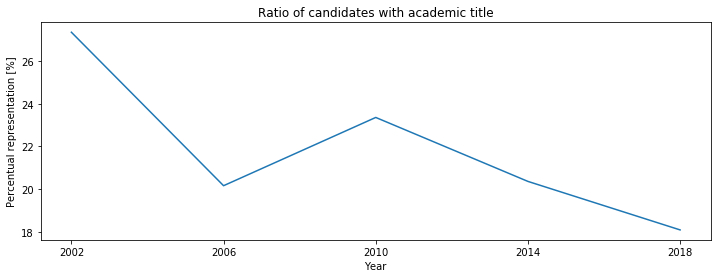

In [86]:
plt.figure(figsize=(12,4))

plt.plot(ratio)
ax = plt.gca()
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])
plt.title('Ratio of candidates with academic title')
plt.xlabel('Year')
plt.ylabel('Percentual representation [%]')
plt.show()

<a id='edu'></a>

## Candidate's education
[Table of content](#table)

The following plot shows the number of candidates with the most frequent Czech academic titles (Bc., Ing., Mgr., MUDr., Ph.D., prof.).

In [90]:
def n_titles(candidates, title):
    return len(candidates[candidates['Name'].str.contains(title)])

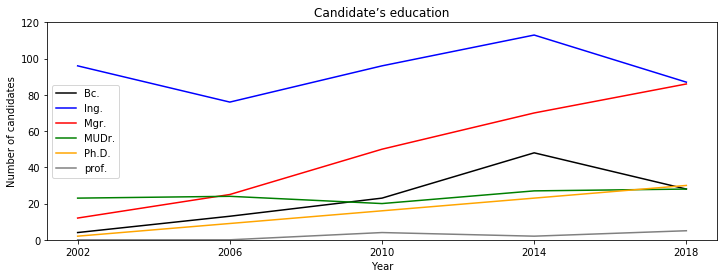

In [93]:
c = [candidates_2002, candidates_2006, candidates_2010, candidates_2014, candidates_2018]

bc = []
ing = []
mgr = []
mudr = []
phd = []
prof = []

for c_list in c:
    bc.append(n_titles(c_list, 'Bc.'))
    ing.append(n_titles(c_list, 'Ing.'))
    mgr.append(n_titles(c_list, 'Mgr.'))
    mudr.append(n_titles(c_list, 'MUDr.'))
    phd.append(n_titles(c_list, 'Ph.D.'))
    prof.append(n_titles(c_list, 'prof.'))
    
fig, ax1 = plt.subplots(figsize=(12,4))
    
plt.plot(bc, color='black', label='Bc.')
plt.plot(ing, color='blue', label='Ing.')
plt.plot(mgr, color='red', label='Mgr.')
plt.plot(mudr, color='green', label='MUDr.')
plt.plot(phd, color='orange', label='Ph.D.')
plt.plot(prof, color='grey', label='prof.')
plt.xticks([0,1,2,3,4], ['2002', '2006', '2010', '2014', '2018'])
plt.legend()
plt.ylim([0,120])
plt.title('Candidate’s education')
plt.xlabel('Year')
plt.ylabel('Number of candidates')
plt.show()

<a id='women'></a>

## Ratio of candidating women and number of elected women
[Table of content](#table)

Next I created an estimation of number of women on the candidate list. In order to do that I searched for names ending with 'ová' and 'ova' which is the traditional ending of women's surnames in Czech Republic. Even though it doesn't cover all the female candidates it provides an accurate estimation.

In [99]:
def female_candidates(candidates):
    return len(candidates[candidates['Name'].str.contains('ová' or 'ova')])

In [100]:
def elected_women(candidates):
    a = candidates[candidates['Name'].str.contains('ová' or 'ova')]
    b = candidates[candidates['Mandate'] == '*']
    
    df = pd.merge(a,b,how='inner')
    
    return len(df)

In [101]:
women_2018 = female_candidates(candidates_2018)
women_2014 = female_candidates(candidates_2014)
women_2010 = female_candidates(candidates_2010)
women_2006 = female_candidates(candidates_2006)
women_2002 = female_candidates(candidates_2002)

women_ratio = [women_2002/len(candidates_2002['Name']) * 100,
               women_2006/len(candidates_2006['Name']) * 100,
               women_2010/len(candidates_2010['Name']) * 100,
               women_2014/len(candidates_2014['Name']) * 100,
               women_2018/len(candidates_2018['Name']) * 100]

women_n = [elected_women(candidates_2018),
           elected_women(candidates_2014),
           elected_women(candidates_2010),
           elected_women(candidates_2006),
           elected_women(candidates_2002)]

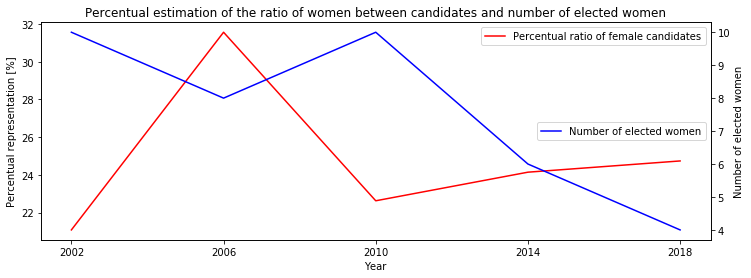

In [102]:
fig, ax1 = plt.subplots(figsize=(12,4))

ax1.plot(women_ratio, color='red', label='Percentual ratio of female candidates')
ax1.set_xticks([0,1,2,3,4])
ax1.set_xticklabels(['2002', '2006', '2010', '2014', '2018'])
ax1.set_ylabel('Percentual representation [%]')
ax1.legend(loc=1)

ax2 = ax1.twinx()
ax2.plot(women_n, color='blue', label='Number of elected women')
ax2.set_ylabel('Number of elected women')
ax2.legend(loc=5)

ax1.set_xlabel('Year')
plt.title('Percentual estimation of the ratio of women between candidates and number of elected women')
plt.show()

<a id='frequent'></a>

## Frequent candidates
[Table of content](#table)

To find the frequent candidates it is necessary to search all datasets with candidates. To do this I created merged all datasets with candidates and counted the number of unique names.

In [104]:
candidates = [candidates_2002, candidates_2006, candidates_2010, candidates_2014, candidates_2018]
candidates = pd.concat(candidates, sort=False)

In [105]:
candidates['Name'].value_counts().head(10)

Vašata Václav Ing.    7
Daňo Vladimír         5
Němeček Jiří PhDr.    5
Michková Ludmila      5
Lisý Pavel Ing.       5
Ludvík Václav Ing.    5
Nejedlý Libor Ing.    5
Podzimek Vladimír     5
Havrda Alois Ing.     5
Skrbek Jan            5
Name: Name, dtype: int64

Candidate Ing. Václav Vašata occurs seven times in the merged dataset. When going through the dataset I fiund out that in years 2006 and 2010 two people candidated with the same name and academic title.<br><br>
The following section shows ten candidates that candidated in all analysed election years.

In [107]:
candidates = pd.concat([
    candidates['Name'], 
    candidates['Age'], 
    candidates['Nominating party'],
    candidates['Political party'],
    candidates['Votes 2002'],
    candidates['Votes 2006'],
    candidates['Votes 2010'],
    candidates['Votes 2014'],
    candidates['Votes 2018']
], axis=1)[1:]

# replacing NaN with 0
candidates = candidates.fillna('0')

candidates[['Votes 2002', 'Votes 2006', 'Votes 2010', 'Votes 2014', 'Votes 2018']] = \
    candidates[['Votes 2002', 'Votes 2006', 'Votes 2010', 'Votes 2014', 'Votes 2018']].apply(pd.to_numeric).astype(int)

In [108]:
candidates[candidates['Name'] == 'Vašata Václav Ing.']

,Name,Age,Nominating party,Political party,Votes 2002,Votes 2006,Votes 2010,Votes 2014,Votes 2018
322,Vašata Václav Ing.,59,ČSSD,ČSSD,4499,0,0,0,0
331,Vašata Václav Ing.,34,SNK ED,BEZPP,0,603,0,0,0
332,Vašata Václav Ing.,63,ČSSD,ČSSD,0,4941,0,0,0
366,Vašata Václav Ing.,38,VV,BEZPP,0,0,1271,0,0
367,Vašata Václav Ing.,67,ČSSD,ČSSD,0,0,6517,0,0
484,Vašata Václav Ing.,71,ČSSD,ČSSD,0,0,0,3351,0
425,Vašata Václav Ing.,75,ČSSD,ČSSD,0,0,0,0,988


Candidate Ing. Václav Vašata senior candidates five times overall. His nominating party was ČSSD everytime.

### List of top ten frequent candidates

In [109]:
pd.merge(candidates[candidates['Name'] == 'Vašata Václav Ing.'], 
         candidates[candidates['Nominating party'] == 'ČSSD'], how='inner').groupby(['Name', 'Nominating party'], as_index=False)\
    ['Votes 2002','Votes 2006','Votes 2010','Votes 2014','Votes 2018'].sum()\
.append(
    candidates[candidates['Name'] == 'Koutník Václav Ing.'].groupby(['Name', 'Nominating party'], as_index=False)\
    ['Votes 2002','Votes 2006','Votes 2010','Votes 2014','Votes 2018'].sum()
)\
.append(
    candidates[candidates['Name'] == 'Lisý Pavel Ing.'].groupby(['Name', 'Nominating party'], as_index=False)\
    ['Votes 2002','Votes 2006','Votes 2010','Votes 2014','Votes 2018'].sum()
)\
.append(
    candidates[candidates['Name'] == 'Michková Ludmila'].groupby(['Name', 'Nominating party'], as_index=False)\
    ['Votes 2002','Votes 2006','Votes 2010','Votes 2014','Votes 2018'].sum()
)\
.append(
    candidates[candidates['Name'] == 'Nejedlý Libor Ing.'].groupby(['Name', 'Nominating party'], as_index=False)\
    ['Votes 2002','Votes 2006','Votes 2010','Votes 2014','Votes 2018'].sum()
)\
.append(
    candidates[candidates['Name'] == 'Fink Zdeněk MUDr.'].groupby(['Name', 'Nominating party'], as_index=False)\
    ['Votes 2002','Votes 2006','Votes 2010','Votes 2014','Votes 2018'].sum()
)\
.append(
    candidates[candidates['Name'] == 'Jaroš Milan'].groupby(['Name', 'Nominating party'], as_index=False)\
    ['Votes 2002','Votes 2006','Votes 2010','Votes 2014','Votes 2018'].sum()
)\
.append(
    candidates[candidates['Name'] == 'Podzimek Vladimír'].groupby(['Name', 'Nominating party'], as_index=False)\
    ['Votes 2002','Votes 2006','Votes 2010','Votes 2014','Votes 2018'].sum()
)\
.append(
    candidates[candidates['Name'] == 'Havrda Alois Ing.'].groupby(['Name', 'Nominating party'], as_index=False)\
    ['Votes 2002','Votes 2006','Votes 2010','Votes 2014','Votes 2018'].sum()
)\
.append(
    candidates[candidates['Name'] == 'Jarošová Jitka'].groupby(['Name', 'Nominating party'], as_index=False)\
    ['Votes 2002','Votes 2006','Votes 2010','Votes 2014','Votes 2018'].sum()
).reset_index(drop=True)

,Name,Nominating party,Votes 2002,Votes 2006,Votes 2010,Votes 2014,Votes 2018
0,Vašata Václav Ing.,ČSSD,4499,4941,6517,3351,988
1,Koutník Václav Ing.,ODS,8128,13136,5205,1631,3051
2,Lisý Pavel Ing.,KDU-ČSL,1756,1428,1823,1480,1915
3,Michková Ludmila,KSČM,3919,3849,3627,2560,1759
4,Nejedlý Libor Ing.,KSČM,4159,4089,3927,2778,1889
5,Fink Zdeněk MUDr.,HDK,0,0,0,10870,7353
6,Fink Zdeněk MUDr.,NK,4481,0,7275,0,0
7,Fink Zdeněk MUDr.,SOS,0,4684,0,0,0
8,Jaroš Milan,ČSSD,3948,4963,6790,3796,1295
9,Podzimek Vladimír,KDU-ČSL,1958,1435,1853,1430,1787


---

[Table of content](#table)